In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from env import user, host, password, get_db_url
from wrangle import wrangle_zillow
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# Exercises

#### Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [2]:
df = wrangle_zillow()

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [6]:
train_validate, test = train_test_split(df, test_size=.2, random_state=99)
train, validate = train_test_split(train_validate, test_size=.3, random_state=99)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172966 entries, 832757 to 2088328
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1172966 non-null  int64  
 1   bathroomcnt                   1172966 non-null  float64
 2   calculatedfinishedsquarefeet  1172966 non-null  int64  
 3   taxvaluedollarcnt             1172966 non-null  int64  
 4   yearbuilt                     1172966 non-null  int64  
 5   taxamount                     1172966 non-null  float64
 6   fips                          1172966 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 71.6 MB


In [9]:
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

In [10]:
train_scaled = train.copy()
scaler = MinMaxScaler()
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [13]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
832757,0.500000,0.166667,0.026073,0.040574,1948,1358.99,6037
38706,0.500000,0.333333,0.022864,0.037762,1963,1243.07,6037
577107,0.500000,0.166667,0.017326,0.149634,1950,3962.06,6037
637181,0.500000,0.333333,0.020585,0.115158,1955,2806.68,6037
1425782,0.666667,0.666667,0.049731,0.209384,1979,5228.44,6037


In [14]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
832757,3,1.0,1545,81163,1948,1358.99,6037
38706,3,2.0,1355,75541,1963,1243.07,6037
577107,3,1.0,1027,299268,1950,3962.06,6037
637181,3,2.0,1220,230320,1955,2806.68,6037
1425782,4,4.0,2946,418759,1979,5228.44,6037


Text(0, 0.5, 'Amount')

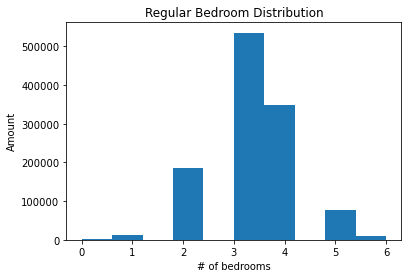

In [15]:
plt.hist(train.bedroomcnt)
plt.title('Regular Bedroom Distribution')
plt.xlabel('# of bedrooms')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

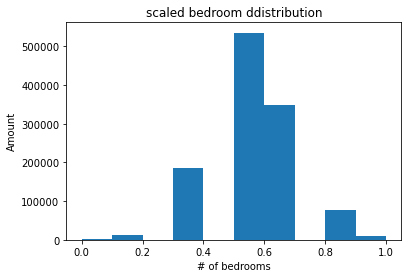

In [16]:
plt.hist(train_scaled.bedroomcnt)
plt.title('scaled bedroom ddistribution')
plt.xlabel('# of bedrooms')
plt.ylabel('Amount')

In [17]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

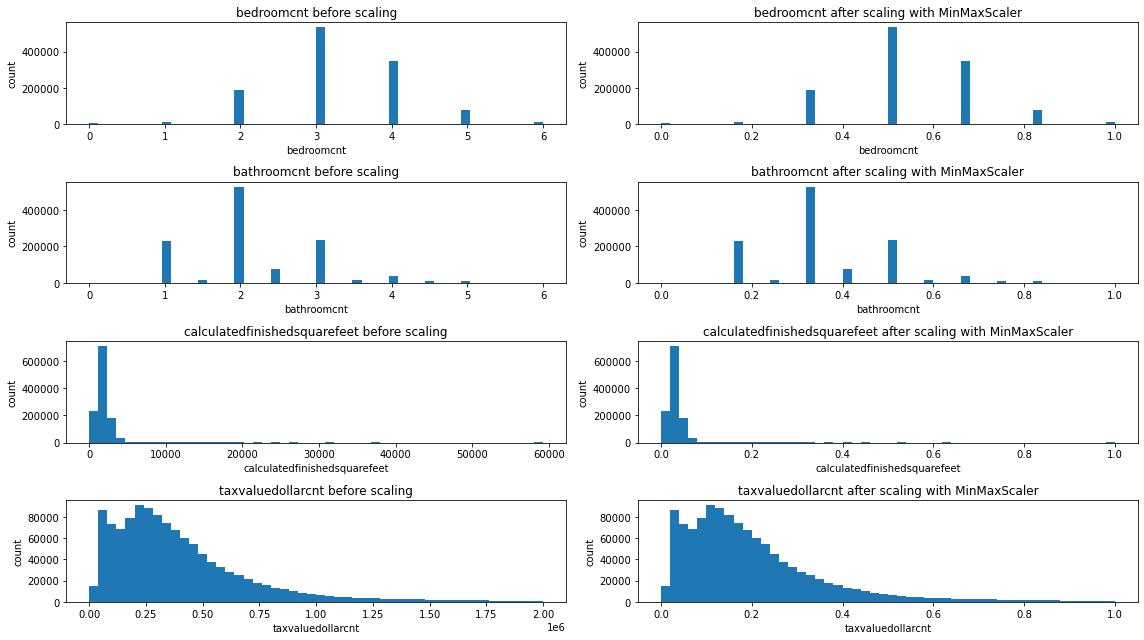

In [19]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

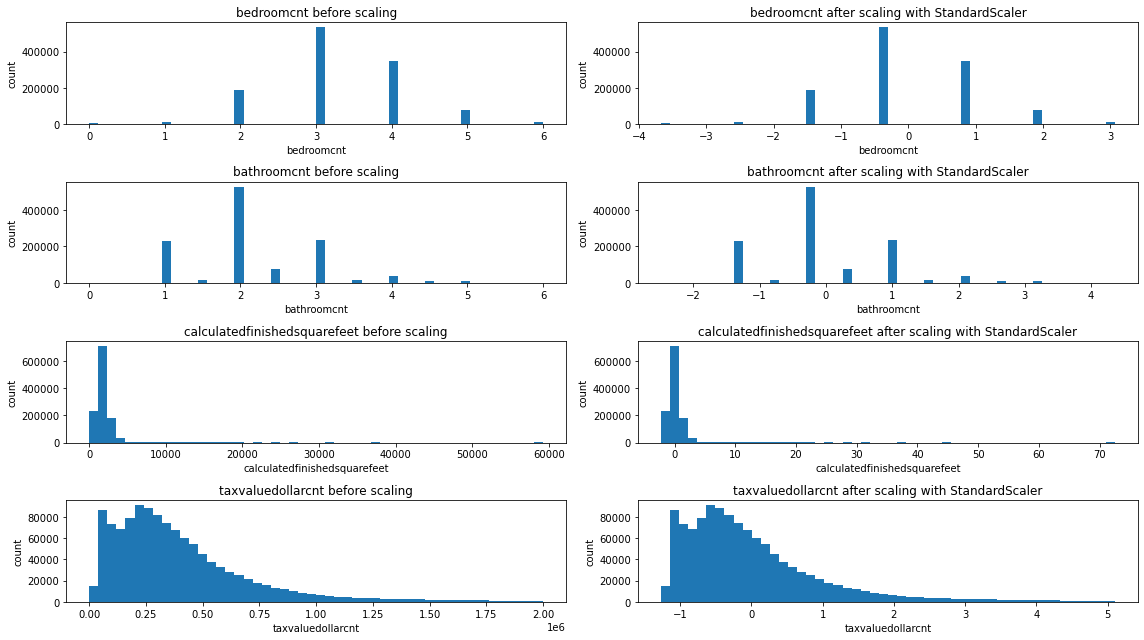

In [20]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

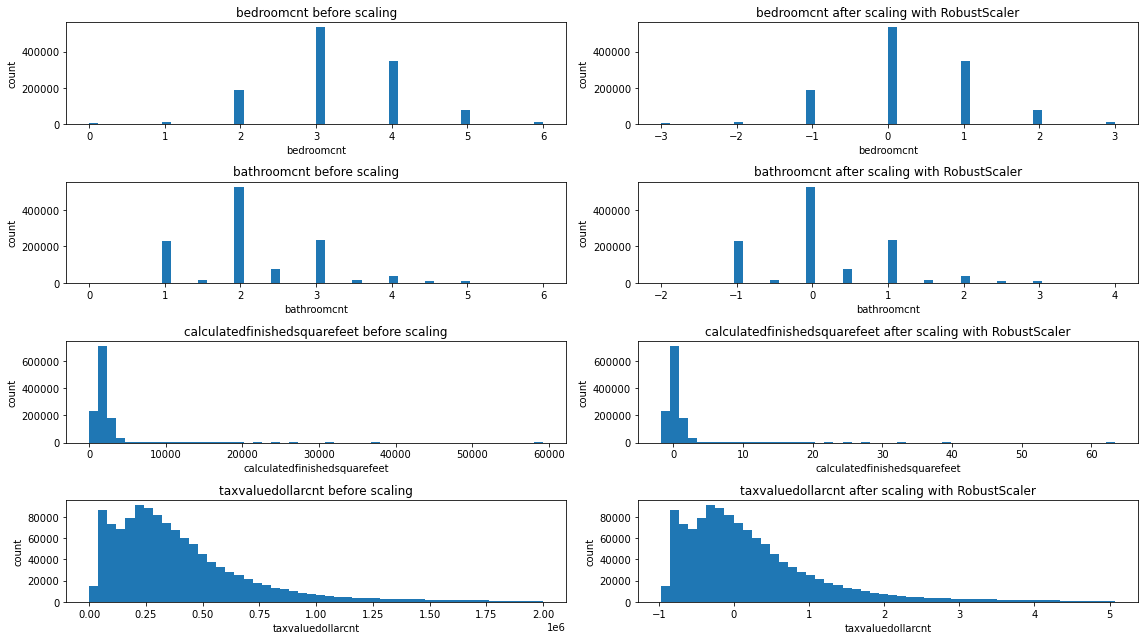

In [21]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [22]:
scaler = MinMaxScaler()
original_data = train[['taxvaluedollarcnt']]
scaled_data = scaler.fit_transform(original_data)

In [24]:
scaled_data[:10]

array([[0.0405735 ],
       [0.03776229],
       [0.14963407],
       [0.11515752],
       [0.20938399],
       [0.02610993],
       [0.05690571],
       [0.06365471],
       [0.297273  ],
       [0.14488572]])

In [25]:
original_data[:10]

,taxvaluedollarcnt
832757,81163
38706,75541
577107,299268
637181,230320
1425782,418759
1590661,52238
124327,113825
47915,127322
1707050,594524
1374042,289772


In [26]:
scaler.inverse_transform(scaled_data)[:10]

array([[ 81163.],
       [ 75541.],
       [299268.],
       [230320.],
       [418759.],
       [ 52238.],
       [113825.],
       [127322.],
       [594524.],
       [289772.]])

In [28]:
(scaler.inverse_transform(scaled_data) == original_data).value_counts()

taxvaluedollarcnt
True                 1135538
False                  37428
dtype: int64

In [32]:
round(37428 / 1135538, 4)

0.033

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

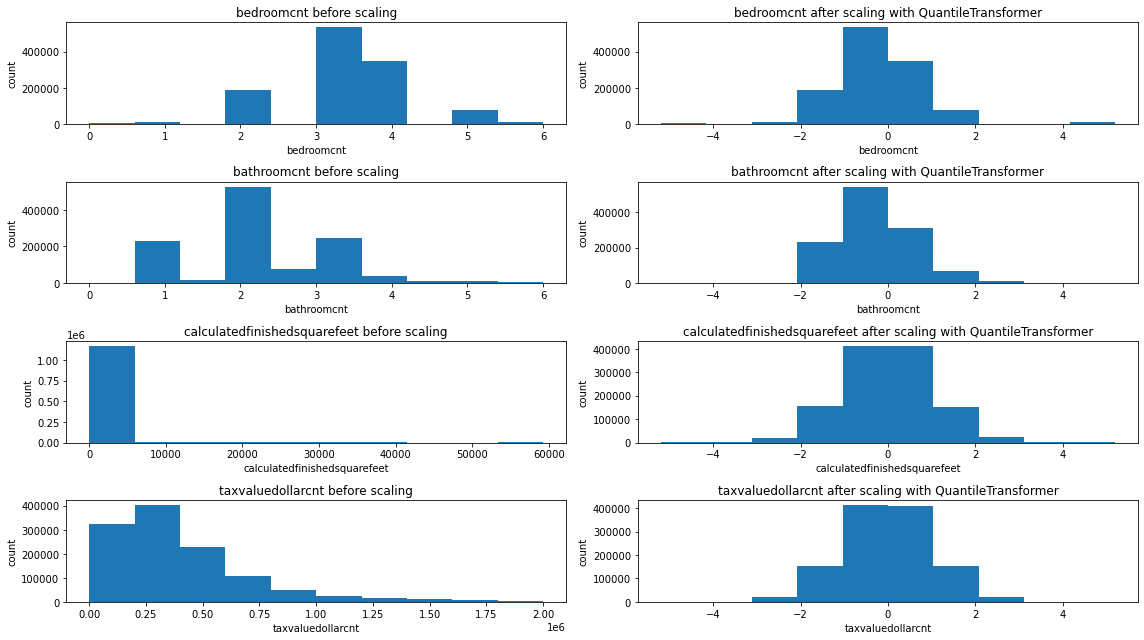

In [33]:
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins = 10)

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [34]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [35]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [40]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
832757,0.500000,0.166667,0.026073,0.040574,1948,1358.99,6037
38706,0.500000,0.333333,0.022864,0.037762,1963,1243.07,6037
577107,0.500000,0.166667,0.017326,0.149634,1950,3962.06,6037
637181,0.500000,0.333333,0.020585,0.115158,1955,2806.68,6037
1425782,0.666667,0.666667,0.049731,0.209384,1979,5228.44,6037
